In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

import warnings
warnings.filterwarnings("ignore", module="matplotlib")
from skimage.io.collection import alphanumeric_key
from glob import glob

import tifffile
import dask as da
import dask_image.imread
import dask_image
import waveorder as wo
import zarr
import napari
import os
from skimage.io.collection import alphanumeric_key
from dask import delayed
%matplotlib inline


In [2]:
main_folder = r'G:\My Drive\Colab Notebooks\3dct\3DeeCellTracker\Examples\0509_oh15265_4\auto_vol1'
files = sorted(glob(main_folder + '/*.tif'), key=alphanumeric_key)
zstack = []
for f in files:
    img = tifffile.imread(f)
    zstack.append(img)
zstack = np.array(zstack)
zstack.shape
zstack[0]
viewer = napari.Viewer()
viewer.add_labels(zstack)


NameError: name 'glob' is not defined

In [7]:
label_1 = viewer.layers['zstack'].data
subfolder = '../manual_vol1'
subfolder_path = os.path.join(main_folder,subfolder)
if not os.path.exists(subfolder_path):
   os.makedirs(subfolder_path)
t=1
for i in range(label_1.shape[0]):
    filename = 'manual_t'+str(t).zfill(4)+'_z'+str(i).zfill(3)+'.tif'
    filepath = os.path.join(subfolder_path,filename)
    tifffile.imwrite(filepath,label_1[i])

In [2]:
# Load main folder
# main_folder = r'F:\Test_ignore\20220509_M25_oh15265_4'
main_folder = r'F:\Test_ignore\20220509_M25_oh15265_50'
processed_files = main_folder + '/'
file_name = 'aligned_stack.ome.tif'
# Load offsets from desired folder
# main_folder =r'F:\Test_ignore\img' #5 L1 moving! amazing neurons.
# processed_files = main_folder + '/'+'processed_files'


main_folder =r'F:\Test_ignore\20220509_M25_oh15265_50\deconv'
processed_files = main_folder +'/'
file_name = 'deconv.tif'
### Loading a folder with the tiff stacks
# main_folder = r'C:\Users\edyoshikun\Documents\edhirata\UCSC\data\10x40_0005'
# folder_names = sorted(glob(main_folder + '/CAM*/'), key=alphanumeric_key)
# file_extension = main_folder + '/zstack' + '*.tif'
# frames = sorted(glob(file_extension),key=alphanumeric_key)
# print(len(frames))

#Scope Parameters
# FOV = 50e-6
cam_px = 6.0e-6
totalmag = 15.75
px_size_img = cam_px/totalmag
zstep = 2e-6
z_scale = zstep/px_size_img

# file_name = 'crop_section_bgsubtract.ome.tif'
# file_name = 'crop_aligned_stack.ome.tif'
filepath_save = os.path.join(processed_files,file_name)
# zarr_stack = zarr.load(filepath_save)
# da_stack = da.array.from_array(zarr_stack)
da_stack  = tifffile.imread(filepath_save)

In [10]:
viewer= napari.Viewer()
viewer.add_image(da_stack, scale= [z_scale,1,1])

c:\ProgramData\Anaconda3\envs\m25-py39\lib\site-packages\napari_tools_menu\__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'da_stack' at 0x20b8eb0e910>

AttributeError: 'AxesImage' object has no property 'scale'

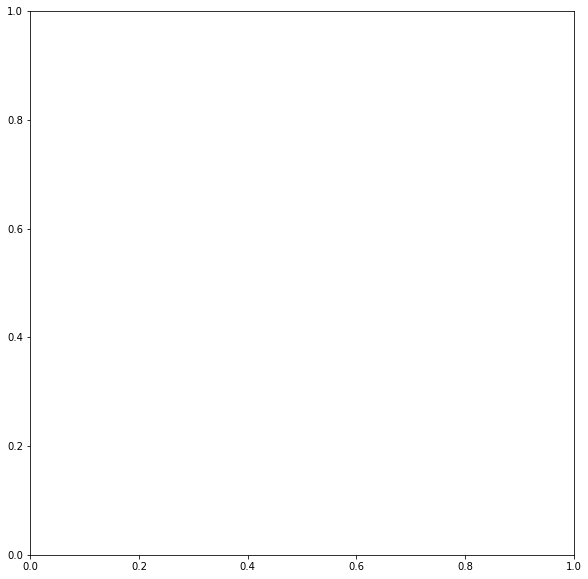

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(da_stack[10,13,:,:],scale= [z_scale,1,1],cmap ='viridis',vmin=0)

In [6]:
import scipy.ndimage as ndi
from scipy.interpolate import interp1d
from skimage import morphology
from skimage import filters
from skimage.segmentation import active_contour
from skimage.restoration import rolling_ball
from skimage import exposure, color,graph
from skimage.feature import hessian_matrix,hessian_matrix_eigvals,peak_local_max
from skimage.measure import regionprops,label,regionprops_table
from skimage.segmentation import watershed

import cv2 

from skimage.morphology import skeletonize
from skan import Skeleton
import analysis_utils as au

In [4]:
viewer.scale_bar.visible = True
viewer.scale_bar.unit = "um"

In [7]:
from skimage import data
blobs = data.binary_blobs(
    length=128, blob_size_fraction=0.05, n_dim=3, volume_fraction=0.1
).astype(float)

viewer = napari.view_image(blobs.astype(float))

# create one random polygon per "plane"
planes = np.tile(np.arange(128).reshape((128, 1, 1)), (1, 5, 1))
np.random.seed(0)
corners = np.random.uniform(0, 128, size=(128, 5, 2))
shapes = np.concatenate((planes, corners), axis=2)

base_cols = ['red', 'green', 'blue', 'white', 'yellow', 'magenta', 'cyan']
colors = np.random.choice(base_cols, size=128)

layer = viewer.add_shapes(
    np.array(shapes),
    shape_type='polygon',
    face_color=colors,
    name='sliced',
)

masks = layer.to_masks(mask_shape=(128, 128, 128))
labels = layer.to_labels(labels_shape=(128, 128, 128))
shape_array = np.array(layer.data)

print(
    f'sliced: nshapes {layer.nshapes}, mask shape {masks.shape}, '
    f'labels_shape {labels.shape}, array_shape, {shape_array.shape}'
)

corners = np.random.uniform(0, 128, size=(2, 2))
layer = viewer.add_shapes(corners, shape_type='rectangle', name='broadcasted')

masks = layer.to_masks(mask_shape=(128, 128))
labels = layer.to_labels(labels_shape=(128, 128))
shape_array = np.array(layer.data)

print(
    f'broadcast: nshapes {layer.nshapes}, mask shape {masks.shape}, '
    f'labels_shape {labels.shape}, array_shape, {shape_array.shape}'
)


c:\ProgramData\Anaconda3\envs\m25-py39\lib\site-packages\napari_tools_menu\__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


sliced: nshapes 128, mask shape (128, 128, 128, 128), labels_shape (128, 128, 128), array_shape, (128, 5, 3)
broadcast: nshapes 1, mask shape (1, 128, 128), labels_shape (128, 128), array_shape, (1, 4, 2)


In [16]:
import vispy.color

vispy.color.get_colormaps()
vispy.color.get_colormap('turbo')

In [22]:
viewer.layers[0].colormap

Colormap(colors=array([[0., 0., 0., 1.],
       [1., 0., 1., 1.]]), name='magenta', interpolation=<ColormapInterpolationMode.LINEAR: 'linear'>, controls=array([0., 1.]))

In [19]:
im_data = np.zeros((50, 50, 50))
im_data[30:40, 25:35, 25:35] = 1
viewer = napari.view_image(im_data, colormap='magenta', rendering='iso')
viewer.add_image(im_data, colormap='green', rendering='iso', translate=(30, 0, 0))

points_data = [
    [50, 30, 30],
    [25, 30, 30],
    [75, 30, 30]
]
viewer.add_points(points_data, size=4)

viewer.dims.ndisplay = 3

c:\ProgramData\Anaconda3\envs\m25-py39\lib\site-packages\napari_tools_menu\__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


In [28]:
# For recordings of strains AML32, we used a segmentation algorithm adopted from Nguyen et al., 2017.
#threshold to find pixels where the intensities are significantly larger than the background. 
# compute 3D Hessian matrix and its eigenvalues of the intensity image.
# Candidate neurons were regions where the maximal eigenvalue was negative.
# Next, we searched for the local intensity peaks in the region 
# and spatially disambiguated peaks in the same region with a watershed separation based on pixel intensity.
def update_bbox(box_large, box_sub):
    new_box = np.array(box_sub)
    new_box[0], new_box[3] = box_large[0] + box_sub[0], box_large[0] + box_sub[3]
    new_box[1], new_box[4] = box_large[1] + box_sub[1], box_large[1] + box_sub[4]
    new_box[2], new_box[5] = box_large[2] + box_sub[2], box_large[2] + box_sub[5]
    return new_box


def kernel_radius(kernel_size, r, dim1_scale=1, normalize=False):
    # the first dimension can be treated differently
    r_x, r_y, r_z = (kernel_size[0] - 1) // 2, (kernel_size[1] - 1) // 2, (kernel_size[2] - 1) // 2
    xv, yv, zv = np.meshgrid(np.arange(-r_x, r_x+1), np.arange(-r_y, r_y+1), np.arange(-r_z, r_z+1), indexing='ij')
    # yv is dim0 xv dim1 zv dim2
    dis2 = (xv * dim1_scale) ** 2 + yv ** 2 + zv ** 2
    kernel = (dis2 <= r ** 2) * 1.
    if normalize:
        return kernel / np.sum(kernel)
    else:
        return kernel

def pt_neighbor(size_im, pt, r, dim1_scale):
    r_x, r_y, r_z = size_im[0], size_im[1], size_im[2]
    xv, yv, zv = np.meshgrid(np.arange(0, r_x), np.arange(0, r_y), np.arange(0, r_z),
                             indexing='ij')
    # yv is dim0 xv dim1 zv dim2
    dis2 = ((xv - pt[0]) * dim1_scale) ** 2 + (yv - pt[1]) ** 2 + (zv - pt[2]) ** 2
    mask = (dis2 <= r ** 2)
    return mask
    
def check_single_neuron(neuron):
    # make sure that only a single neuron is here.
    image = neuron['mask']
    
    num_z = image.shape[0]

    conn = np.ones((3, 3, 3))
    watershed_label = np.zeros(image.shape)
    save_neuron = True
    for z_idx in range(num_z):
        image_z = image[z_idx]
        image_label = label(image_z, connectivity=2)
        num_neuron = image_label.max()
        if num_neuron > 1:
            save_neuron = False
            watershed_label[z_idx] = image_label
            label_sub = watershed(-neuron['image'], markers=watershed_label, connectivity=conn, mask=image)
            props_sub = regionprops(label_sub, intensity_image=neuron['image'])
            for prop in props_sub:
                neu_pos = np.unravel_index(np.argmax(prop.intensity_image, axis=None),
                                            prop.intensity_image.shape)
                new_bbox = update_bbox(neuron['bbox'], prop.bbox)
                neu_pos = np.array(neu_pos).T + np.array(new_bbox[:3])
                neu_pos_c = np.array(prop.centroid) + np.array(new_bbox[:3])

                neuron_new = dict()
                neuron_new['neu_pos'] = neu_pos
                neuron_new['neu_pos_c'] = neu_pos_c
                neuron_new['bbox'] = new_bbox
                neuron_new['mask'] = prop.image
                neuron_new['image'] = prop.intensity_image
                neuron_new['label_o'] = neuron['label_o']
                neuron_new['max_inten'] = prop.max_intensity
                neuron_new['mean_inten'] = prop.mean_intensity
                neuron_new['area'] = prop.area

                check_single_neuron(neuron_new)
            break
    if save_neuron:
        neurons['area'].append(neuron['area'])
        neurons['max_inten'].append(neuron['max_inten'])
        neurons['mean_inten'].append(neuron['mean_inten'])
        neurons['pts_max'].append(neuron['neu_pos'])
        neurons['pts'].append(neuron['neu_pos_c'])
        neurons['label_o'].append(neuron['label_o'])
        neurons['bbox'].append(neuron['bbox'])
        neurons['mask'].append(neuron['mask'])

In [36]:
#Blur the image
img_stack = da_stack[0:50].copy()
t, c, y, x = img_stack.shape
binary = np.zeros_like(img_stack)
print(t,c,y,x)
stack_sum =(img_stack[:,8:21].astype(np.float32)).sum(axis=1)  #for the single plane

# th1 = filters.threshold_otsu(img_gauss)

# for i in range(t):
#     for k in range(c):
#         img_gauss = ndi.gaussian_filter(img_stack[i,k],sigma = 1.0)
#         binary[i,k]= img_gauss >th1


50 25 350 400


(25,)
grey threshold:233.84120207704785
3500000
88


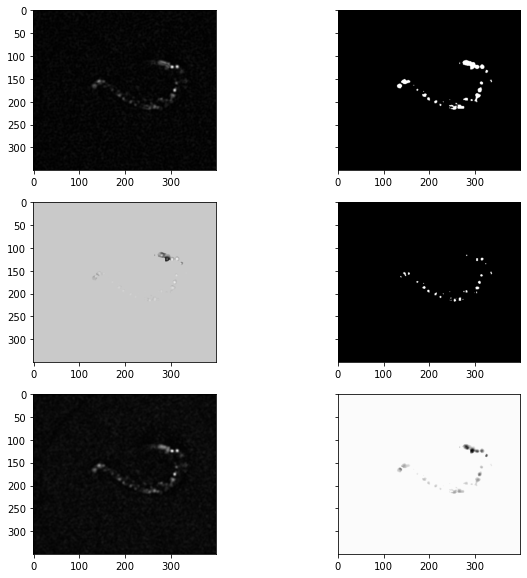

In [103]:
worm = np.copy(img_stack[10,:])

std_array = np.std(worm, axis=(1, 2))
worm_diff = np.copy(worm)
# edge =5
# worm_diff[:, :edge, :] = 0
# worm_diff[:, -edge:, :] = 0
# worm_diff[:, :, :edge] = 0
# worm_diff[:, :, -edge:] = 0


mean_sz = 5
max_sz = 8
worm_diff = ndi.uniform_filter(worm_diff, size=[1, mean_sz, mean_sz])
test = worm_diff[13]

# contrast to local minima
worm_diff = worm_diff + ndi.maximum_filter(-worm_diff, size=[1, max_sz, max_sz])
print(std_array.shape)
std_array = std_array[std_array > 10]
# print(std_array)

fac =3
if len(std_array):
    std_min_idx = np.argmin(std_array)
    grey_thd = fac * std_array[std_min_idx]
else:
    grey_thd = 5 * fac

print('grey threshold:{}'.format(grey_thd))
grey_mask = worm_diff > grey_thd

H_matrix = hessian_matrix(worm, sigma=2, order='rc')

H_matrix_sub = list()
for h_m in H_matrix:
    H_matrix_sub.append(h_m * grey_mask)

H_eig = - hessian_matrix_eigvals(H_matrix_sub)[0]
eig_3 = hessian_matrix_eigvals(H_matrix_sub)[2]

mask_n = H_eig > 0
# mask_n[:, :edge, :] = False
# mask_n[:, -edge:, :] = False
# mask_n[:, :, :edge] = False
# mask_n[:, :, -edge:] = False

label_n = ndi.label(mask_n)[0]
print(label_n.size)
if label_n.max() > 600:
    print(label_n.max())
    print("EEROOORRR")
    
props = regionprops(label_n, intensity_image=worm)
print(len(props))
# print(props[0].intensity_image)

fig, ax = plt.subplots(3, 2, figsize=(10, 10), sharey=True)
ax[0, 0].imshow(worm_diff[13], cmap=plt.cm.gray)
# ax[0, 0].set_title('a) Raw')
ax[0, 1].imshow(grey_mask[13], cmap=plt.cm.gray)
ax[1, 0].imshow(H_eig[13], cmap=plt.cm.gray)
ax[1, 1].imshow(mask_n[13], cmap=plt.cm.gray)
ax[2, 0].imshow(test, cmap=plt.cm.gray)
ax[2, 1].imshow(eig_3[13], cmap=plt.cm.gray)





In [4]:
viewer = napari.Viewer()

Assistant skips harvesting pyclesperanto as it's not installed.


c:\ProgramData\Anaconda3\envs\m25-py39\lib\site-packages\napari_tools_menu\__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


In [7]:

# img = np.copy(da_stack[81])
img = np.copy(da_stack[81])
c,y,x = img.shape 
viewer.add_image(img)
# test_label_1= np.zeros_like(img)
test_1 = img
worm = img
# for i in range(c):
std_array = np.std(worm, axis=(1, 2))
worm_diff = np.copy(worm)

mean_sz = 5
max_sz = 8
worm_diff = ndi.uniform_filter(worm_diff, size=[1, mean_sz, mean_sz])
test = worm_diff[13]

# contrast to local minima
worm_diff = worm_diff + ndi.maximum_filter(-worm_diff, size=[1, max_sz, max_sz])
print(std_array.shape)
std_array = std_array[std_array > 10]
# print(std_array)

fac =3
if len(std_array):
    std_min_idx = np.argmin(std_array)
    grey_thd = fac * std_array[std_min_idx]
else:
    grey_thd = 5 * fac

print('grey threshold:{}'.format(grey_thd))
grey_mask = worm_diff > grey_thd

H_matrix = hessian_matrix(worm, sigma=2, order='rc')

H_matrix_sub = list()
for h_m in H_matrix:
    H_matrix_sub.append(h_m * grey_mask)

H_eig = - hessian_matrix_eigvals(H_matrix_sub)[0]

mask_n = H_eig > 0
test_label_1 = mask_n

viewer.add_labels(mask_n,color={0:'black'})

(25,)
grey threshold:188.3879968129674


<Labels layer 'mask_n' at 0x20b5ee3dc70>

In [31]:
label_1 = viewer.layers['mask_n'].data *255
main_folder=r'C:\Users\yoshi\Documents\edhirata\M25\tutorials\3DeeCellTracker\test'
subfolder = 'test_label3'
subfolder_path = os.path.join(main_folder,subfolder)
if not os.path.exists(subfolder_path):
   os.makedirs(subfolder_path)

for i in range(label_1.shape[0]):
    filename = 'label_3_'+str(i).zfill(3)+'.tif'
    filepath = os.path.join(subfolder_path,filename)
    tifffile.imwrite(filepath,label_1[i])

In [10]:
subfolder = 'test_set3'
subfolder_path = os.path.join(main_folder,subfolder)
if not os.path.exists(subfolder_path):
   os.makedirs(subfolder_path)
for i in range(img.shape[0]):
    filename = 'test3_'+str(i).zfill(3)+'.tif'
    filepath = os.path.join(subfolder_path,filename)
    tifffile.imwrite(filepath,img[i])


In [94]:
# a = peak_local_max(props[1].intensity_image, threshold_abs=None, indices=False,exclude_border=False, footprint=max_kernel3)
# print(a)
# worm_max_image = props[1].intensity_image * a
# print(worm_max_image)
# pt = np.unravel_index(np.argmax(worm_max_image, axis=None), worm_max_image.shape)
# print(pt)
i=4
max_kernel3 = kernel_radius([3, 5, 5], r=4, dim1_scale=z_scale, normalize=False)
a = peak_local_max(props[i].intensity_image, threshold_abs=None,exclude_border=False, footprint=max_kernel3)
print(props[i].intensity_image.shape)
print(a.shape)
a.ndim
# print(worm_max_image)
d = np.zeros((6,6)) > 1
print(d)



(5, 6, 6)
(5, 3)
[[ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]]


In [140]:
viewer.add_image(mask_n,opacity=0.5)
viewer.add_image(worm,opacity=0.5)

<Image layer 'worm' at 0x221ab431eb0>

In [167]:
# 3D images for 20 timesteps
test_img_stack = np.zeros((3, 40, 400, 400))

rect_0 = np.array(
    [
        [0, 10, 100, 100],
        [0, 10, 200, 100],
        [0, 10, 200, 200],
        [0, 10, 100, 200]
    ]
)
rect_1 = rect_0 + [1, 10, 100, 100]
rect_2 = rect_0 + [2, 10, 200, 200]

shapes = [rect_0, rect_1, rect_2]

#one label per box
labels = ['rect_0', 'rect_1', 'rect_2']

# specify properties and text
properties = {
    'label': labels
}

text_parameters = {
    'text': 'label',
    'size': 30,
    'color': 'green',
    'anchor': 'center',
}
viewer.add_shapes(shapes, shape_type='polygon', face_color='transparent',
                      edge_color='green', name='Box', blending='additive',
                      properties=properties, text=text_parameters)

<Shapes layer 'Box' at 0x2d14594c760>

In [113]:
area_thd = 4
neurons = dict()
neurons['pts'] = list()
neurons['pts_max'] = list()
neurons['area'] = list()
neurons['max_inten'] = list()
neurons['mean_inten'] = list()
neurons['label_o'] = list()
neurons['bbox'] = list()
neurons['mask'] = list()

max_kernel3 = kernel_radius([3, 5, 5], r=3, dim1_scale=z_scale, normalize=False)
conn = np.ones((3, 3, 3))

for prop in props:
    save_prop = True
    if prop.area > area_thd:
        worm_max = peak_local_max(prop.intensity_image, threshold_abs=None,indices=False, exclude_border=False, footprint=max_kernel3)
        worm_max_image = prop.intensity_image * worm_max
        candidate = list()
        worm_max_new = np.zeros(worm_max.shape) > 1
        while worm_max_image.sum() > 0:
            pt = np.unravel_index(np.argmax(worm_max_image, axis=None), worm_max_image.shape)
            max_mask = pt_neighbor(size_im=worm_max.shape, pt=pt, r=4.2, dim1_scale=2)  # 4.2, 2
            candidate.append(pt)
            worm_max_new[pt] = True
            worm_max_image[max_mask] = 0

        if len(candidate) >= 2:
            save_prop = False
            markers = ndi.label(worm_max_new)[0]
            label_sub = watershed(-prop.intensity_image, markers=markers, connectivity=conn, mask=prop.image)
            props_sub = regionprops(label_sub, intensity_image=prop.intensity_image)

            for prop_sub in props_sub:
                if prop_sub.area > area_thd:
                    # neu_pos = np.unravel_index(np.argmax(prop_sub.intensity_image, axis=None), prop_sub.intensity_image.shape)
                    # marker is of size prop
                    neu_pos = np.where(markers == prop_sub.label)
                    new_bbox = update_bbox(prop.bbox, prop_sub.bbox)
                    neu_pos = np.array(neu_pos).T[0] + np.array(prop.bbox[:3])
                    neu_pos_c = np.array(prop_sub.centroid) + np.array(new_bbox[:3])
                    neuron = dict()
                    neuron['neu_pos'] = neu_pos
                    neuron['neu_pos_c'] = neu_pos_c
                    neuron['bbox'] = new_bbox
                    neuron['mask'] = prop_sub.image
                    neuron['image'] = prop_sub.intensity_image
                    neuron['label_o'] = prop.label
                    neuron['max_inten'] = prop_sub.max_intensity
                    neuron['mean_inten'] = prop_sub.mean_intensity
                    neuron['area'] = prop_sub.area
                    check_single_neuron(neuron)
        if save_prop:
            neu_pos = np.unravel_index(np.argmax(prop.intensity_image, axis=None),
            prop.intensity_image.shape)
            neu_pos = np.array(neu_pos) + np.array(prop.bbox[:3])
            neu_pos_c = np.array(prop.centroid)
            neuron = dict()
            neuron['neu_pos'] = neu_pos
            neuron['neu_pos_c'] = neu_pos_c
            neuron['bbox'] = prop.bbox
            neuron['mask'] = prop.image
            neuron['image'] = prop.intensity_image
            neuron['label_o'] = prop.label
            neuron['max_inten'] = prop.max_intensity
            neuron['mean_inten'] = prop.mean_intensity
            neuron['area'] = prop.area
            check_single_neuron(neuron)

neurons_pos = np.array(neurons['pts_max'])
neurons['num_neuron'] = len(neurons_pos)
print('find {} neurons'.format(neurons['num_neuron']))
print('\n')


find 96 neurons




C:\Users\yoshi\AppData\Local\Temp\ipykernel_23348\4293865122.py:18: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  worm_max = peak_local_max(prop.intensity_image, threshold_abs=None,indices=False, exclude_border=False, footprint=max_kernel3)


In [149]:
train_1 = da_stack[81]
val_1 = da_stack[551]

viewer.add_image(train_1,name='81')
viewer.add_image(val_1, name ='551')

c,y,x = train_1.shape

bt1 = np.zeros_like(train_1)
bv1= np.zeros_like(val_1)

thresh = filters.threshold_otsu(train_1[13])
for i in range(c):
    bt1[i] = train_1[i]>thresh
    bv1[i] = val_1[i]>thresh

viewer.add_labels(bt1,color ={1:'white'})
viewer.add_labels(bv1,color ={1:'white'})

<Labels layer 'bv1' at 0x2d146e77370>

In [123]:
viewer.add_labels(neurons['mask'][0])

<Labels layer 'Labels [1]' at 0x2d14075bc10>

In [117]:
pd.DataFrame.from_dict(neurons)

,pts,pts_max,area,max_inten,mean_inten,label_o,bbox,mask,num_neuron
0,"[2.0, 15.8, 229.8]","[2, 16, 230]",15,4077.0,610.066667,2,"(2, 14, 228, 3, 19, 233)","[[[False, True, True, False, False], [True, Tr...",96
1,"[2.0, 85.92857142857143, 265.85714285714283]","[2, 86, 266]",14,11176.0,1627.500000,3,"(2, 84, 264, 3, 89, 269)","[[[False, False, True, False, False], [True, T...",96
2,"[9.0, 73.76470588235294, 183.76470588235293]","[9, 74, 184]",17,4444.0,592.705882,4,"(9, 72, 182, 10, 77, 187)","[[[False, True, True, True, False], [True, Tru...",96
3,"[10.878504672897197, 162.44859813084113, 137.4...","[11, 161, 138]",107,3126.0,1268.766355,5,"[9, 160, 135, 14, 166, 141]","[[[False, False, False, False, False, False], ...",96
4,"[9.742857142857144, 180.02857142857144, 125.11...","[10, 176, 125]",35,1167.0,748.428571,6,"[9, 174, 123, 12, 178, 128]","[[[False, False, True, True, True], [True, Tru...",96
...,...,...,...,...,...,...,...,...,...
91,"[20.868852459016395, 127.85245901639344, 236.2...","[21, 128, 238]",61,2250.0,1044.295082,84,"[20, 125, 233, 23, 132, 241]","[[[False, False, False, False, False, False, F...",96
92,"[20.61904761904762, 136.28571428571428, 229.95...","[20, 135, 229]",21,1026.0,544.428571,85,"[20, 134, 227, 23, 139, 232]","[[[False, True, False, False, False], [True, T...",96
93,"[22.689655172413794, 138.44827586206895, 227.8...","[22, 138, 227]",29,872.0,587.793103,85,"[21, 135, 226, 23, 141, 231]","[[[False, False, False, False, False], [False,...",96
94,"[21.0, 139.54545454545453, 221.36363636363637]","[21, 142, 222]",11,679.0,413.545455,86,"(21, 136, 221, 22, 143, 223)","[[[True, False], [True, False], [True, False],...",96


In [150]:
print(len(props))
props[0].area

47


14

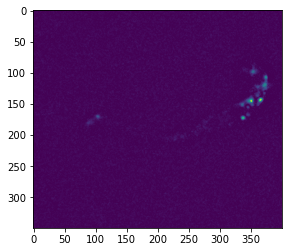

In [44]:
plt.imshow(img_stack[0,13])


In [ ]:
#Borrowing from NeRVEclustering
def distanceInterp(xyzs,n):
    d=xyzs.size
    xyzout = np.zeroes(n,d)
    ds = np.sqrt(np.sum(np.diff(xyzs)**2))
    s = np.array([[0],[np.cumsum(ds)]],dtype='float')
    Lsearch = np.linspace(0,max(s),n)
    for i in range(1,d):
        xyzout[:,i]=interp1d(s, xyzs[:,i],kind='cubic',fill_value=Lsearch)
    return xyzout
    

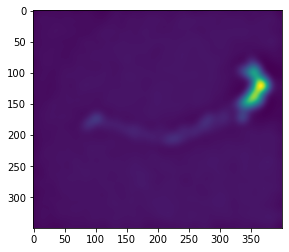

In [14]:
label = viewer.layers['Labels'].data
worm_label = wo.im_bit_convert(label[0,0],bit=8,norm='True')
skeleton =skeletonize(worm_label,method='lee')
# skeleton = skeleton[:,np.newaxis,:,:]
# # skeleton = skeleton[np.newaxis,:,:,:]
n_interpol=100
print(skeleton.shape)
sk_skeleton =Skeleton(skeleton)
coords = sk_skeleton.path_coordinates(0)
coords.shape
interp_coord = au.interpolate_skeleton(coords,n_interpol)

(350, 400)


In [15]:
viewer.add_image(skeleton, colormap='magenta', blending='additive')

<Image layer 'skeleton' at 0x2219665c280>

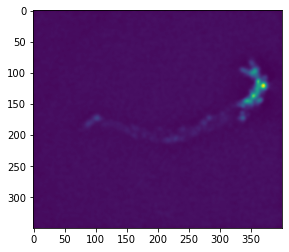

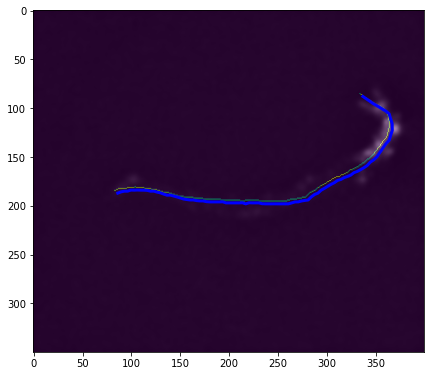

In [36]:
gauss = ndi.gaussian_filter(stack_sum[0],sigma=2)
plt.figure()
plt.imshow(gauss)
snake = active_contour(gauss,interp_coord, alpha=1, w_edge=1, beta=1,gamma = 0.001)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(gauss, cmap=plt.cm.gray)
ax.plot(snake[:,1],snake[:,0],'-b',lw=3)
ax.imshow(skeleton, alpha=0.5)

In [ ]:
s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T
print(init.shape)

(400, 2)


# TESTING HERE SHALL BEGIN

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

import warnings
warnings.filterwarnings("ignore", module="matplotlib")
from skimage.io.collection import alphanumeric_key
from glob import glob

import tifffile
import dask as da
import dask_image.imread
import dask_image
import waveorder as wo
import zarr
import napari
import os
from skimage.io.collection import alphanumeric_key
from dask import delayed
%matplotlib inline

In [2]:
# Load main folder
# main_folder =r'F:\Test_ignore\20220509_M25_oh15265_4' #5 L1 moving! amazing neurons.
# file_name = 'crop_aligned_stack_8bit.tif'

main_folder = r'F:\Matlab Magic\Extended-Volume-3D-deconvolution-master\Extended-Volume-3D-deconvolution-master\10x40_0005\processed_files'
file_name ='decon_8bit.ome.tif'


filepath_read = os.path.join(main_folder,file_name)
# zarr_stack = zarr.load(filepath_save)
# da_stack = da.array.from_array(zarr_stack)
np_stack1  = tifffile.imread(filepath_read)
np_stack = np_stack1[100:500,:,:,:]

### Loading a folder with the tiff stacks
# main_folder = r'C:\Users\edyoshikun\Documents\edhirata\UCSC\data\10x40_0005'
# folder_names = sorted(glob(main_folder + '/CAM*/'), key=alphanumeric_key)
# file_extension = main_folder + '/zstack' + '*.tif'
# frames = sorted(glob(file_extension),key=alphanumeric_key)
# print(len(frames))

#Scope Parameters
# FOV = 50e-6
cam_px = 6.0e-6
totalmag = 15.75
px_size_img = cam_px/totalmag
zstep = 2e-6
z_scale = zstep/px_size_img

In [9]:
np_stack.shape

(735, 25, 445, 445)

In [3]:
features = tp.locate(np_stack[1], diameter=(3,11,11), noise_size =0.6)
features.head()

,z,y,x,mass,size_z,size_y,size_x,ecc,signal,raw_mass,ep_z,ep_y,ep_x
0,1.005464,85.371585,336.311475,65.733775,0.527910,1.837675,1.614484,NaN,10.057627,222.0,0.005421,0.087919,0.087919
1,0.996637,138.984305,142.311659,320.407255,0.265759,3.982585,3.753922,NaN,6.824818,1286.0,0.000450,0.007306,0.007306
2,0.989855,199.627536,369.014493,247.848661,0.329690,3.483501,3.456563,NaN,7.184019,848.0,0.000724,0.011735,0.011735
3,0.990208,207.785742,344.377987,917.040047,0.334116,3.128092,3.053191,NaN,32.687287,3069.0,0.000178,0.002880,0.002880
4,1.006303,233.691176,299.363445,170.979656,0.137505,3.867284,4.296520,NaN,4.310412,2184.0,0.000254,0.004119,0.004119


Features found: 27
Features found: 27


,z,y,x,mass,size_z,size_y,size_x,ecc,signal,raw_mass,ep_z,ep_y,ep_x
0,5.347573,235.024102,302.028590,1780.866335,1.915650,2.396286,2.389931,NaN,25.753885,5833.0,0.007101,0.004130,0.004130
1,4.732231,253.632649,310.562714,1557.666000,2.842001,2.463300,2.368912,NaN,50.619705,9934.0,0.004065,0.002365,0.002365
2,4.954431,271.973046,332.102579,1526.583725,2.171662,2.354677,2.454827,NaN,24.273777,5586.0,0.007435,0.004325,0.004325
3,5.170792,274.898997,333.066444,1327.657166,1.881791,2.537346,2.396765,NaN,21.905603,4803.0,0.008739,0.005083,0.005083
4,5.412100,275.932384,333.943535,1247.731317,1.840818,2.501957,2.379031,NaN,19.537430,4328.0,0.009780,0.005689,0.005689


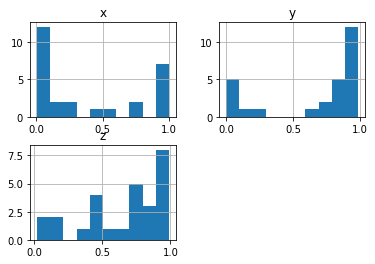

In [8]:
# features = tp.locate(np_stack[5], diameter=(7,13,13), threshold =8,minmass=300,separation= (3,1,1))
features = tp.locate(np_stack[5], diameter=(11,7,7), threshold =8,minmass=300,separation= (3,1,1))

print('Features found: {0}'.format(len(features)))
tp.subpx_bias(features)
print('Features found: {0}'.format(len(features)))
features.head()

In [6]:
test =tp.annotate3d(features,np_stack[1],color=None)
test3 =np.array(test[:,np.newaxis,:,:,:])
test3 = np.swapaxes(test3,1,4)
test3 = np.squeeze(test3)

wo.image_stack_viewer(np.clip(test3,0,0.5),colormap='viridis')

interactive(children=(IntSlider(value=0, description='stack_idx_1', max=24), IntSlider(value=0, description='s…

<function waveorder.visual.image_stack_viewer.<locals>.interact_plot_4D(stack_idx_1, stack_idx_2)>

In [5]:
volume = tp.batch(np_stack, diameter=(7,13,13), threshold =8,minmass=200, separation= (3,1,1))


Frame 399: 68 features


In [7]:
volume['xum']=volume['x']*0.381
volume['yum']=volume['y']*0.381
volume['zum']=volume['z']*2


Frame 399: 68 trajectories present.


C:\Users\yoshi\AppData\Local\Temp\ipykernel_16740\44561345.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, bins = np.histogram(np.bincount(linked.particle.astype(int)),


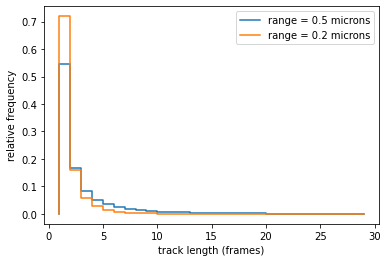

In [9]:
for search_range in [0.5,0.2]:
    linked = tp.link_df(volume, search_range, pos_columns=['xum', 'yum', 'zum'])
    hist, bins = np.histogram(np.bincount(linked.particle.astype(int)),
                              bins=np.arange(30), normed=True)
    plt.step(bins[1:], hist, label='range = {} microns'.format(search_range))
plt.ylabel('relative frequency')
plt.xlabel('track length (frames)')
plt.legend();

Frame 399: 68 trajectories present.


c:\ProgramData\Anaconda3\envs\m25-py39\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
c:\ProgramData\Anaconda3\envs\m25-py39\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


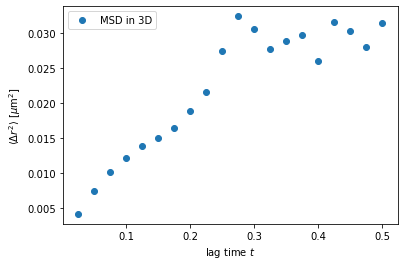

In [10]:
linked = tp.link_df(volume, 0.5, pos_columns=['xum', 'yum', 'zum'])
msd3D = tp.emsd(linked, mpp=1, fps=40, max_lagtime=20,
                pos_columns=['xum', 'yum', 'zum'])
ax = msd3D.plot(style='o', label='MSD in 3D')
ax.set_ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
ax.set_xlabel('lag time $t$')
# ax.set_xlim(0, 16)
# ax.set_ylim(0, 20)
ax.legend(loc='upper left');

In [12]:
linked

,z,y,x,mass,size_z,size_y,size_x,ecc,signal,raw_mass,ep_z,ep_y,ep_x,frame,xum,yum,zum,particle
0,6.121845,147.272158,265.176358,3140.385007,2.104982,4.084584,4.292846,NaN,17.436016,17449.0,0.011187,0.023442,0.023442,0,101.032192,56.110692,12.243691,0
91,15.336673,254.828171,331.035850,5854.063147,1.698474,5.104088,4.959229,NaN,41.529420,68842.0,0.002587,0.005421,0.005421,0,126.124659,97.089533,30.673346,1
89,14.639884,253.968481,335.029768,6336.565265,1.786985,5.232048,4.782256,NaN,44.382586,65566.0,0.002720,0.005701,0.005701,0,127.646342,96.761991,29.279768,2
88,15.341501,253.631240,331.010975,6210.391913,1.680808,5.322782,4.857179,NaN,45.650660,71238.0,0.002498,0.005234,0.005234,0,126.115181,96.633503,30.683002,3
87,14.708053,252.783504,334.910688,6495.708539,1.757394,5.297531,4.789416,NaN,46.284697,67375.0,0.002645,0.005543,0.005543,0,127.600972,96.310515,29.416105,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35439,8.795456,313.006447,305.832102,8035.569165,1.942482,5.172175,4.335225,NaN,45.768091,45097.0,0.002873,0.006021,0.006021,399,116.522031,119.255456,17.590912,27676
35438,8.668364,312.092509,320.858279,5186.631221,1.530300,4.634856,5.666501,NaN,61.107946,42004.0,0.003092,0.006479,0.006479,399,122.247004,118.907246,17.336727,27677
35436,7.714818,332.439524,370.150949,6002.409727,1.872166,4.847682,4.427400,NaN,29.422344,33539.0,0.003904,0.008182,0.008182,399,141.027512,126.659459,15.429637,27626
35443,8.738656,317.189511,334.618386,7470.760742,1.773418,3.800844,5.636607,NaN,56.329958,48273.0,0.002679,0.005613,0.005613,399,127.489605,120.849204,17.477313,27678


In [13]:
data = linked.loc[:,['particle','frame','z','y','x']]
data = data.dropna(axis=0)
data= data.to_numpy()
print(data)

properties = linked.loc[:,['mass', 'size_z', 'size_y', 'size_x','signal','raw_mass','ep_z','ep_y','ep_x']]

[[0.00000000e+00 0.00000000e+00 6.12184535e+00 1.47272158e+02
  2.65176358e+02]
 [1.00000000e+00 0.00000000e+00 1.53366728e+01 2.54828171e+02
  3.31035850e+02]
 [2.00000000e+00 0.00000000e+00 1.46398839e+01 2.53968481e+02
  3.35029768e+02]
 ...
 [2.76260000e+04 3.99000000e+02 7.71481838e+00 3.32439524e+02
  3.70150949e+02]
 [2.76780000e+04 3.99000000e+02 8.73865625e+00 3.17189511e+02
  3.34618386e+02]
 [2.75970000e+04 3.99000000e+02 1.41808380e+01 3.33005508e+02
  3.70094287e+02]]


In [44]:
print(data)

[[  0.           0.           2.00883838  61.02651515  66.00505051]
 [  1.           0.          13.01877133  71.2668942  170.48088737]
 [  2.           0.          13.01603421  71.97274185 161.2100481 ]
 ...
 [743.          99.          13.         121.41345094  87.85777288]
 [749.          99.          13.98573873  81.41357673  98.94808899]
 [737.          99.          13.         109.63412322  71.14834123]]


In [8]:
viewer= napari.Viewer()

Assistant skips harvesting pyclesperanto as it's not installed.


c:\ProgramData\Anaconda3\envs\m25-py39\lib\site-packages\napari_tools_menu\__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


In [18]:
viewer.add_points(data[:,1:], size=5,name='particles',face_color='white',
edge_color= '#ff55ff', scale=[1,z_scale,1,1])


<Points layer 'particles' at 0x1f69e652bb0>

In [16]:
viewer.add_tracks(data, scale=[z_scale,1,1])

<Tracks layer 'data' at 0x1f69ccb2490>

In [9]:
viewer.add_image(np_stack, scale=[z_scale,1,1])

<Image layer 'np_stack' at 0x21c0de1bd90>

In [21]:
all_traj = []
for ind in linked.particle.unique():
    curr_traj = linked[linked.particle==ind][['particle','frame','z','y','x']].values
    if curr_traj.shape[0]>2:
        all_traj.append(curr_traj)

In [86]:
np_stack.shape
# all_traj = np.swapaxes(all_traj,2,0)

(100, 25, 200, 200)

In [28]:
search_range = 0.5
t = tp.link_df(features, search_range, memory=5)
tp.plot_traj(t, superimpose=img)
unstacked = t.set_index(['frame', 'particle']).unstack()

data = pd.DataFrame()
for item in set(t.particle):
    sub = t[t.particle==item]
    dvx = np.diff(sub.x)
    dvy = np.diff(sub.y)
    for x, y, dx, dy, frame in zip(sub.x[:-1], sub.y[:-1], dvx, dvy, sub.frame[:-1],):
        data = data.append([{'dx': dx, 
                             'dy': dy, 
                             'x': x,
                             'y': y,
                             'frame': frame,
                             'particle': item,
                            }]) 

KeyError: 'frame'

In [15]:
viewer = napari.Viewer(ndisplay=3)

Assistant skips harvesting pyclesperanto as it's not installed.


c:\ProgramData\Anaconda3\envs\m25-py39\lib\site-packages\napari_tools_menu\__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


In [72]:
viewer.add_image(np_stack,scale=[z_scale,1,1], multiscale=False)

<Image layer 'np_stack' at 0x2936f706fa0>

In [ ]:
viewer.add_points()

In [73]:
viewer.add_tracks(np.swapaxes(np_stack,), scale=[z_scale,1,1])

TypeError: _swapaxes_dispatcher() missing 2 required positional arguments: 'axis1' and 'axis2'

The diffusion constant is 13.83 μm²/s


C:\Users\yoshi\AppData\Local\Temp\ipykernel_25040\571327229.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  slope = np.linalg.lstsq(msd3D.index[:, np.newaxis], msd3D)[0][0]
C:\Users\yoshi\AppData\Local\Temp\ipykernel_25040\571327229.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  slope = np.linalg.lstsq(msd3D.index[:, np.newaxis], msd3D)[0][0]


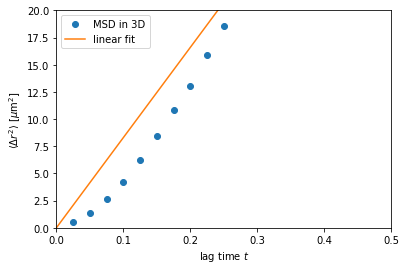

In [58]:
slope = np.linalg.lstsq(msd3D.index[:, np.newaxis], msd3D)[0][0]

ax = msd3D.plot(style='o', label='MSD in 3D')
ax.plot(np.arange(5), slope * np.arange(5), label='linear fit')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]', xlabel='lag time $t$')
ax.set(xlim=(0, 0.5), ylim=(0, 20))
ax.legend(loc='upper left')
print(r'The diffusion constant is {0:.2f} μm²/s'.format(slope / 6))